In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_colwidth", 200)
sns.set(style="whitegrid")


In [ ]:
DATA_DIR = "/Users/venkatchandan/Desktop/ML_Projects/BasicProjects/FakeNewsDetection/data/News _dataset"  

true_path = os.path.join(DATA_DIR, "True.csv")
fake_path = os.path.join(DATA_DIR, "Fake.csv")

true_df = pd.read_csv(true_path)
fake_df = pd.read_csv(fake_path)



In [8]:
true_df['label'] = 1
fake_df['label'] = 0
df = pd.concat([true_df,fake_df],ignore_index = True)
df.sample(5)

,title,text,subject,date,label
4909,White House proposes reviving Yucca Mountain nuclear waste site,WASHINGTON (Reuters) - The White House’s 2018 budget plan for the U.S. Department of Energy includes $120 million for nuclear waste programs including the restart of licensing for Nevada’s Yucca M...,politicsNews,"March 16, 2017",1
29176,Republican U.S. Senator Openly Admits He’d Take A KKK-Loving Trump Over Any Democrat,"The Republican party cannot, in good faith, agree that they are still the Party of Lincoln, because as President Lincoln worked tirelessly to end slavery and reunite the nation, our modern-day G...",News,"March 1, 2016",0
4003,Exclusive: Trump complains Saudis not paying fair share for U.S. defense,WASHINGTON (Reuters) - President Donald Trump complained on Thursday that U.S. ally Saudi Arabia was not treating the United States fairly and Washington was losing a “tremendous amount of money” ...,politicsNews,"April 28, 2017",1
27817,HILARIOUS: Seth Myers Exposes Trump’s Racist White Power Pals (VIDEO),"Late Night host Seth Myers had a fun segment recently, pointing out the blatant support presumptive Republican presidential nominee Donald Trump has received from racist white supremacists. Myers ...",News,"May 13, 2016",0
12585,What's behind Vietnam's corruption crackdown?,HANOI (Reuters) - Vietnam s crackdown on high level corruption has led to the arrest of dozens of officials from state oil firm PetroVietnam and the banking sector. As well as shedding light on gr...,worldnews,"December 11, 2017",1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [13]:
df['text_len'] = df['text'].astype(str).str.len()
df['word_count'] = df['text'].astype(str).str.split().str.len()
df[['text_len','word_count']].describe()

,text_len,word_count
count,44898.000000,44898.000000
mean,2469.109693,405.282284
std,2171.617091,351.265595
min,1.000000,0.000000
25%,1234.000000,203.000000
50%,2186.000000,362.000000
75%,3105.000000,513.000000
max,51794.000000,8135.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


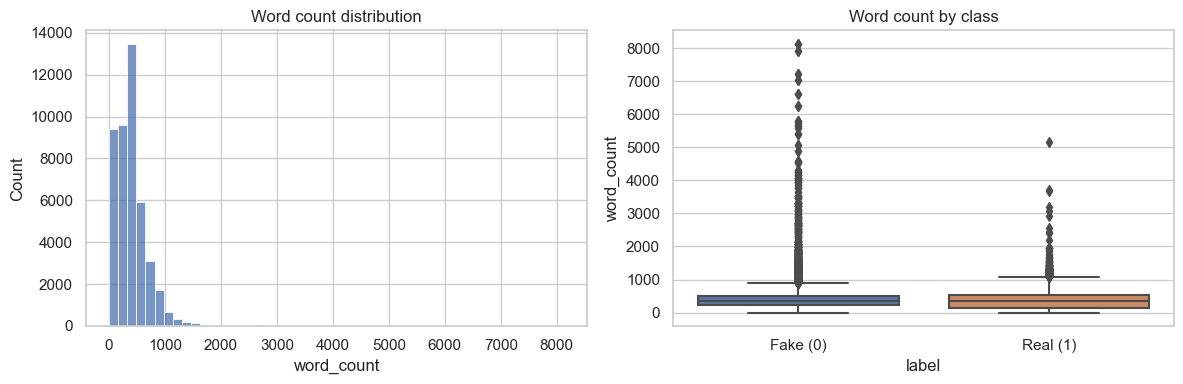

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df["word_count"], bins=50, ax=axes[0])
axes[0].set_title("Word count distribution")

sns.boxplot(x="label", y="word_count", data=df, ax=axes[1])
axes[1].set_title("Word count by class")
axes[1].set_xticklabels(["Fake (0)", "Real (1)"])

plt.tight_layout()
plt.show()


Not much Eda to do tbh